In [4]:
cd ..

/home/spotlight/git/deeplearning-seminar/code


In [5]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%autoreload 2

In [7]:
from Network import VAE

In [8]:
arch = [784,512,512,2]

In [9]:
v = VAE.VAE(arch)

Building tensorflow graph with the following hyper parameters:
	learning_rate: 0.001
	nonlin: <function relu at 0x7fd51a8fabf8>
	batch_size: 128
	squash: <function sigmoid at 0x7fd51aa5f8c8>
With the following network architecture: [784,512,512,2]
Done constructing network


In [10]:
import input_data

In [11]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [12]:
v.train(mnist, num_epochs=300, plot_manifold = False)

[**] Begin training: 09:42:40.883255
epoch 0: avg cost: 189.74966487926142
epoch 1: avg cost: 164.4891693892044
epoch 2: avg cost: 158.71972542613636
epoch 3: avg cost: 154.60954442471586
epoch 4: avg cost: 151.65767002840914
epoch 5: avg cost: 149.7448755681818
epoch 6: avg cost: 148.48713568892035
epoch 7: avg cost: 147.16105234374993
epoch 8: avg cost: 146.17047460937485
epoch 9: avg cost: 145.23852009943175
epoch 10: avg cost: 144.67638874289773
epoch 11: avg cost: 144.11217734375012
epoch 12: avg cost: 143.69230617897736
epoch 13: avg cost: 143.00476289062507
epoch 14: avg cost: 142.58190227272726
epoch 15: avg cost: 142.14307347301147
epoch 16: avg cost: 141.7488817826704
epoch 17: avg cost: 141.24185706676147
epoch 18: avg cost: 140.93911605113638
epoch 19: avg cost: 140.4820746448864
epoch 20: avg cost: 140.24047194602272
epoch 21: avg cost: 139.86209847301134
epoch 22: avg cost: 139.65502262073852
epoch 23: avg cost: 139.25924485085218
epoch 24: avg cost: 138.85793444602268
ep

128.05934625355107

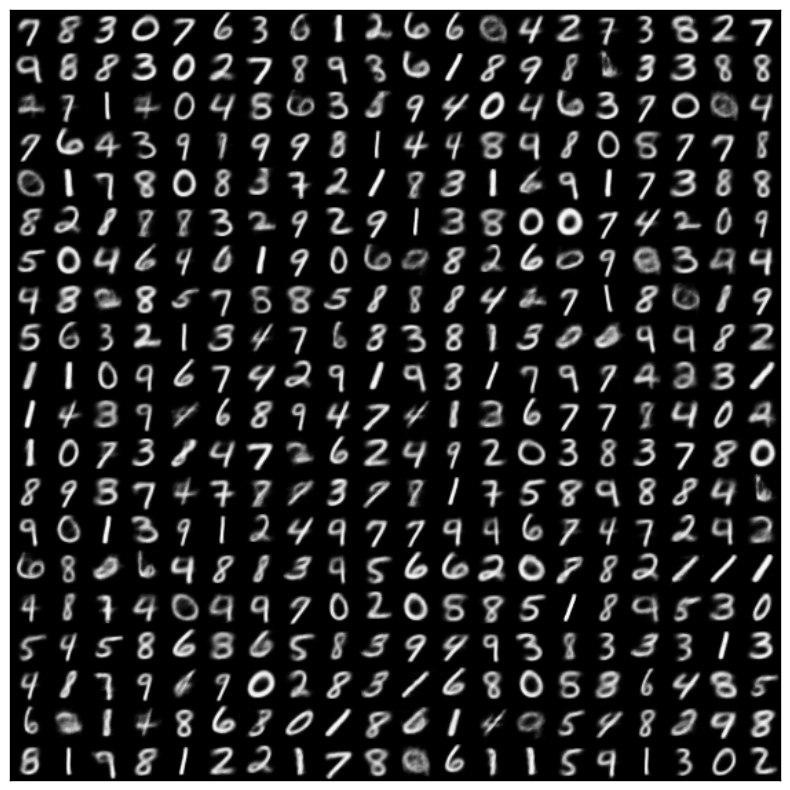

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
nx = ny = 20
x_values = np.linspace(-3, 3, nx)
y_values = np.linspace(-3, 3, ny)

canvas = np.empty((28*ny, 28*nx))
for i in range(0,nx):
    for j in range(0,ny):
        x_mean = v.decode()
        canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = x_mean[0].reshape(28, 28)

plt.figure(figsize=(8, 10))        
Xi, Yi = np.meshgrid(x_values, y_values)
plt.imshow(canvas, cmap='gray')
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig('reconstructions.pdf')

In [ ]:
#mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
import csv
num_samples = 500000
num_epochs = num_samples // 55000
f = open('data_viz.csv', 'w')
writer = csv.writer(f)
for i in range(0, num_epochs):
    raw, labels = mnist.train.next_batch(55000)
    for raw, label in zip(raw, labels):
        z_mean, z_log_sigma = v.encode(raw.reshape(1, 784))
        data.append([label, z_mean[0][0], z_mean[0][1], z_mean[0][2]])
    print("encoded one epoch worth of data (55000 samples)")
print("lets go")
writer.writerows(data)
print("done writing")
f.close()

In [ ]:
mnist.train.num_examples

In [31]:
raw, labels = mnist.test.next_batch(1)

In [37]:
z = v.encode(raw)
np.set_printoptions(precision=5)

In [54]:
print("dim #20: mean: {}, sigma: {}".format(z[0][0,20], z[1][0,20]))

dim #20: mean: -1.0636762380599976, sigma: -0.6982788443565369


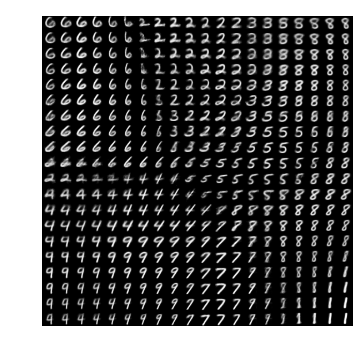

In [16]:
%matplotlib inline
v.plot_manifold(axis=(0,1), range_x=(-1,1), range_y=(-1,1), num_rowdigits=20, output='manifold.pdf')

(280, 280)


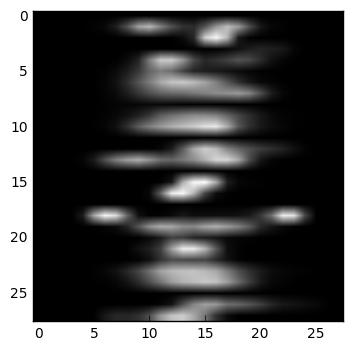

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dec_100 = np.array((100,28,28))
dec_100 = np.array([v.decode() for i in range(0,100)])
dec_100 = dec_100.reshape(280,280, order='A')
print(dec_100.shape)
#plt.imshow(v.decode().reshape(28,28), cmap=plt.cm.gray)
plt.imshow(dec_100[0:28,0:28], cmap=plt.cm.gray)

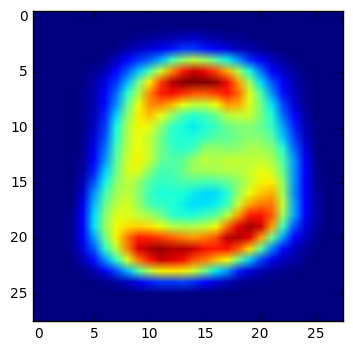

In [22]:
plt.imshow(v.decode().reshape((28,28)))


In [35]:
import numpy as np
samples_1 = np.random.multivariate_normal(z_mean.flatten(), np.eye(2)*z_log_sigma**2,3)

In [86]:
num_samples = 200
samples = np.random.multivariate_normal(z_mean.flatten(), np.eye(2)*z_log_sigma**2,num_samples)
x = samples[:,0]
y = samples[:,1]

In [34]:
import matplotlib.pyplot as plt
import matplotlib.mlab
%matplotlib inline
num_samples = 200
samples = np.random.multivariate_normal(z_mean.flatten(), np.eye(2)*z_log_sigma**2,num_samples)
x = samples[:,0]
y = samples[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=200, range=[[-3, 3], [-3, 3]])
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
plt.show()

NameError: name 'z_log_sigma' is not defined

NameError: name 'X' is not defined

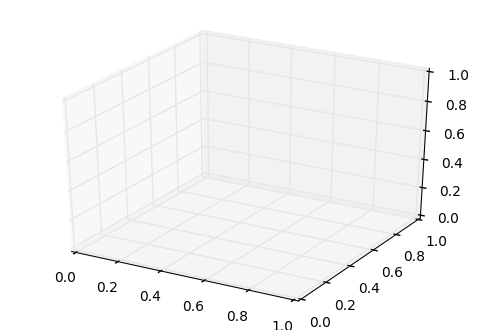

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, probs, rstride=5, cstride=5, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
surf = ax.plot_surface(X2, Y2, probs2, rstride=5, cstride=5, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
plt.savefig('dist.pdf')

In [296]:
from scipy.stats import multivariate_normal
var1 = multivariate_normal(mean=z_mean.flatten(), cov=np.eye(2)*z_log_sigma**2)
var2 = multivariate_normal(mean=z_mean2.flatten(), cov=np.eye(2)*z_log_sigma2**2)

In [297]:
start = -20
end   =  20
step_len = 0.1
xs = np.arange(start,end,step_len)
ys = np.arange(start,end,step_len)
X,Y = np.meshgrid(xs,ys)
coord = [(x,y) for x in xs for y in xs]
probs = var1.pdf(coord).reshape(X.shape)

In [298]:
start = -20
end   =  20
step_len = 0.1
xs2 = np.arange(start,end,step_len)
ys2 = np.arange(start,end,step_len)
X2,Y2 = np.meshgrid(xs2,ys2)
coord2 = [(x,y) for x in xs2 for y in xs2]
probs2 = var2.pdf(coord2).reshape(X2.shape)

In [284]:
print(X.shape)
print(Y.shape)
print(len(coord))
print(probs.shape) 

(400, 400)
(400, 400)
160000
(400, 400)


In [295]:
z_mean2

array([[-0.13366972,  0.31588092]], dtype=float32)

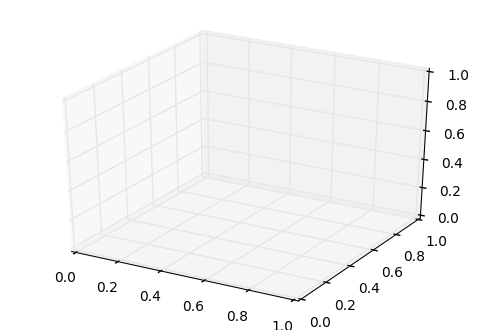

In [215]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

In [216]:
print(X.shape)
print(Y.shape)
print(Z.shape)

(40, 40)
(40, 40)
(40, 40)


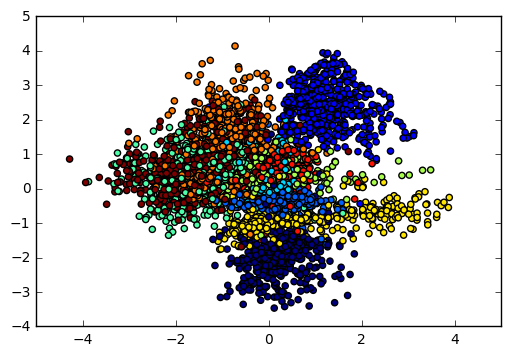

In [26]:
v.plot_z_mean(mnist)

In [30]:
import seaborn as sns
raw, labels = mnist.test.next_batch(5000)
z_mean,_ = v.encode(raw)
sns.regplot(z_mean)

TypeError: regplot() missing 1 required positional argument: 'y'

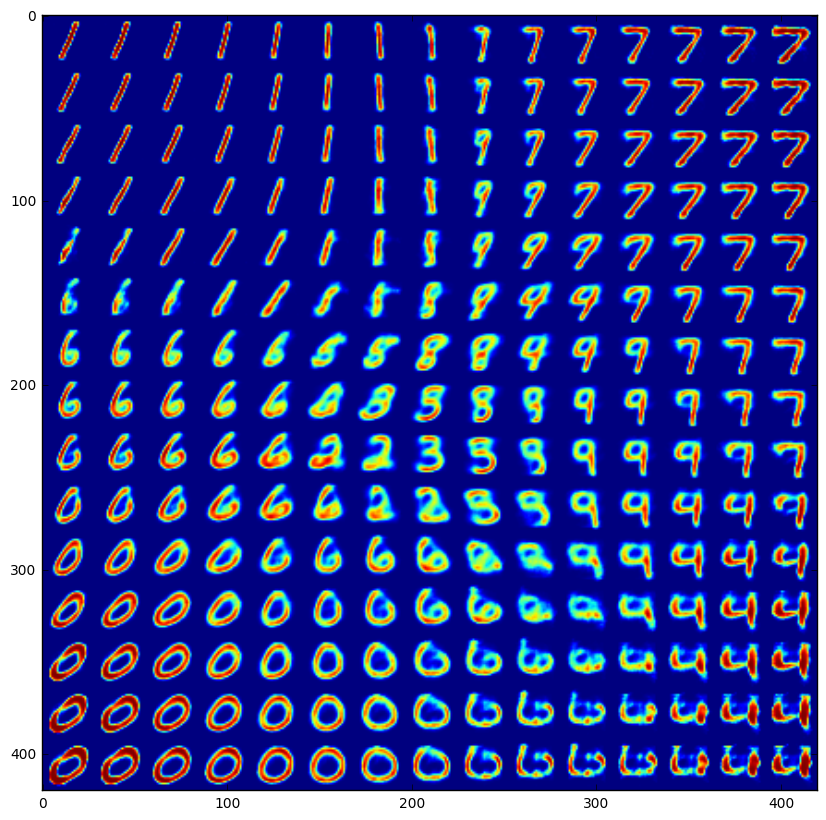

In [26]:
import numpy as np

epsilon_std = 1.0
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-3, 3, n)
grid_y = np.linspace(-3, 3, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]) * epsilon_std
        x_decoded = v.decode(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

cost for validation batch: 149.15501403808594
done


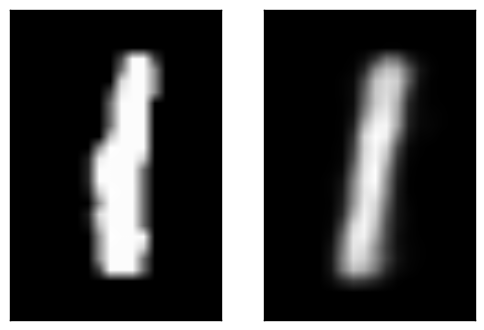

In [29]:
v.plot_reconstruction(mnist)

In [30]:
batch = mnist.test.next_batch(100)

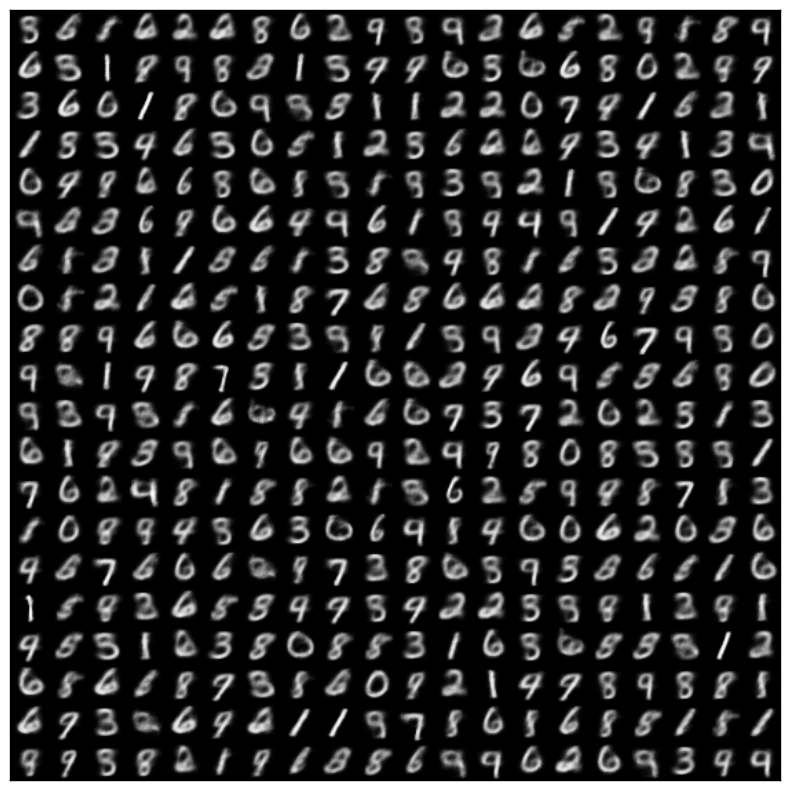

In [38]:
nx = ny = 20
x_values = np.linspace(-3, 3, nx)
y_values = np.linspace(-3, 3, ny)

canvas = np.empty((28*ny, 28*nx))
for i in range(0,nx):
    for j in range(0,ny):
        x_mean = v.decode()
        canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = x_mean[0].reshape(28, 28)

plt.figure(figsize=(8, 10))        
Xi, Yi = np.meshgrid(x_values, y_values)
plt.imshow(canvas, cmap='gray')
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig('reconstructions.pdf')

In [73]:
#A = np.matrix([[1,0,0],[2,4,0],[3,5,6]])
x = np.matrix([[1],[2],[3]])
A = np.matrix([[2,0,0], [1,6,0], [2,5,10]])  

In [74]:
A[:,0]

matrix([[2],
        [1],
        [2]])

In [75]:
j = 0
y_priv_0 = A[:,j] * x[j][0]

In [76]:
y_priv_0

matrix([[2],
        [1],
        [2]])

In [77]:
j = 1
y_priv_1 = A[:,j] * x[j][0]

In [78]:
y_priv_1

matrix([[ 0],
        [12],
        [10]])

In [79]:
j = 2
y_priv_2 = A[:,j] * x[j][0]

In [80]:
y_priv_2

matrix([[ 0],
        [ 0],
        [30]])

In [81]:
y_priv_0 + y_priv_1 + y_priv_2

matrix([[ 2],
        [13],
        [42]])